### PROBLEM STATEMENT for K-NN:

The given dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with Parkinson's Disease, according to "status" column which is set to 0 for healthy and 1 for PD.  Dataset can be downloaded from below link.

https://archive.ics.uci.edu/ml/datasets/parkinsons

Create classification model using KNN.  Identify the optimum no of neighbors and dimensions for your model.

Justify if KNN model should be considered or not for the problem statement.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import random
import warnings
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [4]:
ds=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')

About Parkinson Disease:

- Parkinson’s disease is a chronicle disorder of central nervous system which causes the death of the nervous cell in the brain. 

- Parkinson’s disease more often appeared after the age of 60. 

- Parkinson’s disease is progressive and the number of people suffering from the disease is expected to rise. The disease usually happens slowly and persists over a long period of time.

### 1) Handling of missing values, outliers, if any .

In [5]:
print(ds[ds.duplicated()])
ds.info()

Empty DataFrame
Columns: [name, MDVP:Fo(Hz), MDVP:Fhi(Hz), MDVP:Flo(Hz), MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP, MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA, NHR, HNR, status, RPDE, DFA, spread1, spread2, D2, PPE]
Index: []

[0 rows x 24 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB

#### From above analysis, Understood that is no null or duplicate values identified.

### Outlier Treatment:

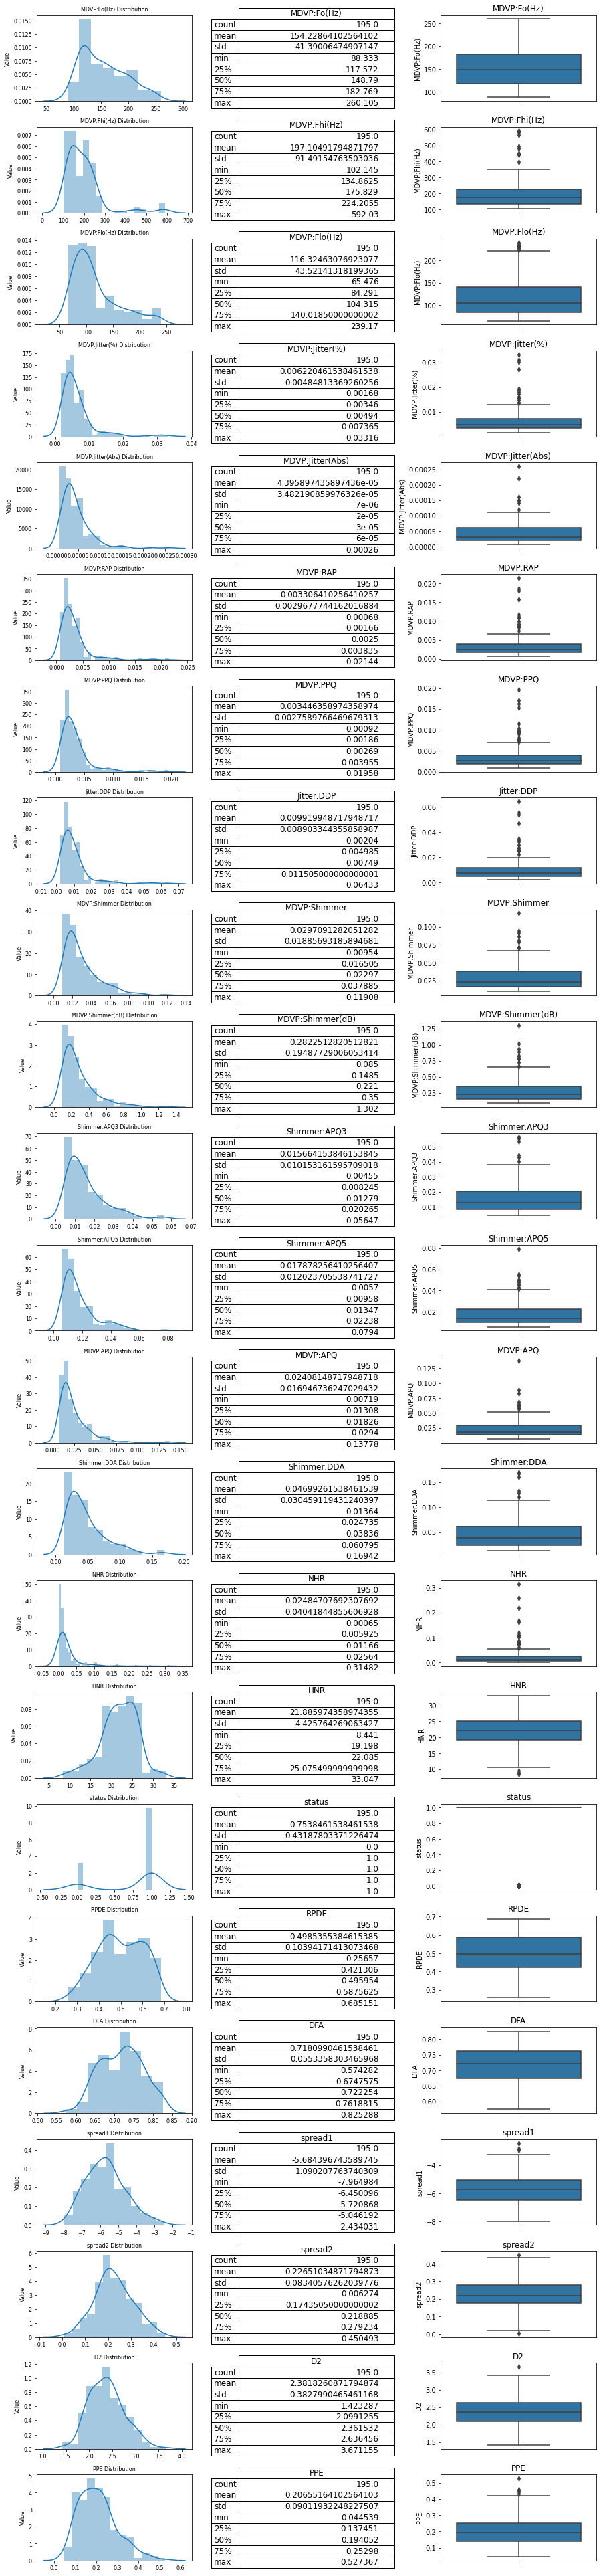

In [6]:
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, axes = plt.subplots(nrows=23, ncols=3, figsize=(15, 70))    
for idx,cat_col in enumerate(ds.describe().columns):
    cl_idx=0
    sns.distplot(ds[cat_col],ax=axes[idx,cl_idx])
    plt.title(cat_col)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
    axes[idx][cl_idx].set_title(cat_col+" Distribution",fontsize=8)    
    axes[idx][cl_idx].xaxis.set_tick_params(labelsize=8,rotation=0)
    axes[idx][cl_idx].yaxis.set_tick_params(labelsize=8)
    axes[idx][cl_idx].set_ylabel('Value',fontsize=8)
    axes[idx][cl_idx].set(xlabel=None)    
    df = pd.DataFrame(ds[cat_col], columns=[cat_col])
    des_lb=df.describe()
    axes[idx][cl_idx+1].axis('off')
    axes[idx][cl_idx+1].axis('tight')
    table = axes[idx][cl_idx+1].table(cellText=des_lb.values, colLabels=des_lb.columns, rowLabels=des_lb.index, loc='center')
    table.set_fontsize(12)
    table.scale(1,1.5)    
    sns.boxplot(y=ds[cat_col],ax=axes[idx,cl_idx+2])
    plt.title(cat_col)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.30)
    axes[idx][cl_idx+2].set_title(cat_col,fontsize=12)     
    axes[idx][cl_idx+2].yaxis.set_tick_params(labelsize=10)


- Most of the attributes are either positively skewed or negatively skewed, In those places there are chances of few outliers.<br><br>
<b>Data Understanding</b>
- 23 Interval Attributes
- 1 Nominal Attribute

In [7]:
ds.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


<AxesSubplot:>

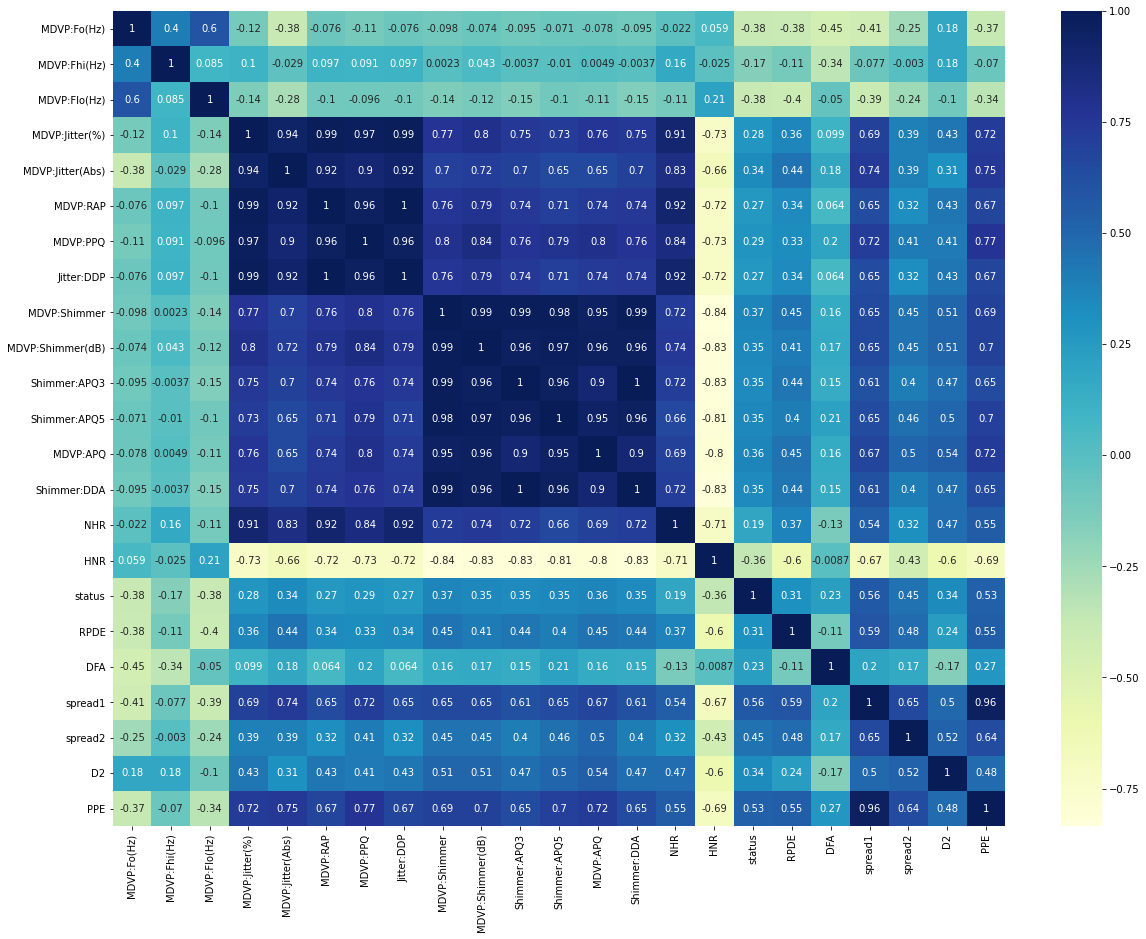

In [8]:
a4_dims = (20, 15)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(ds.corr(), annot=True, cmap="YlGnBu")

#### Univariate Analysis
- In order to generalize the model well, it is crucial that the training data be an accurate representation of the population. 
- In other words, each time a new sample is derived from the population, it is crucial that the sample must accurately paint a picture of the population. 
- A training set of data must be representative of the cases you want to generalize to. To analyse this we need to see how the data is distributed and findout the if the data is positively skewed or negatively skewed. 
- Analysis of this is important an the samples might tend to favor a select portion of the population, and thus might not accurately represent the true population. This is also popularly known as the presence of Skewness in data, and the data can be either right-skewed or left-skewed. Pearson's Kurtosis also defines how the data is distributed and where the data lies.

#### Kurtosis with positive values indicates that those attributes have more data points around the tail.

#### Skewness with positive values indicates data is skewed towards right.

#### Skewness with negative values indicates data is skewed towards left


In [9]:
kur=ds.kurtosis(numeric_only  = True)
kur

MDVP:Fo(Hz)         -0.627898
MDVP:Fhi(Hz)         7.627241
MDVP:Flo(Hz)         0.654615
MDVP:Jitter(%)      12.030939
MDVP:Jitter(Abs)    10.869043
MDVP:RAP            14.213798
MDVP:PPQ            11.963922
Jitter:DDP          14.224762
MDVP:Shimmer         3.238308
MDVP:Shimmer(dB)     5.128193
Shimmer:APQ3         2.720152
Shimmer:APQ5         3.874210
MDVP:APQ            11.163288
Shimmer:DDA          2.720661
NHR                 21.994974
HNR                  0.616036
status              -0.595518
RPDE                -0.921781
DFA                 -0.686152
spread1             -0.050199
spread2             -0.083023
D2                   0.220334
PPE                  0.528335
dtype: float64

In [10]:
prc_row=[]
def fnd_skew_kurt(col_val):
    prc_row.append([col_val,ds[col_val].skew(),ds[col_val].kurtosis()])
for i in ds.describe().columns[:22]:
    fnd_skew_kurt(i)
before_out_treatment=pd.DataFrame(prc_row,columns=['Feature_Before_Treatment','Skew_Before_Treatment','Kurtosis_Before_Treatment'])

### Outlier Treatment

In [11]:
ds_clone=ds.copy()
out_trt_row=[]
def outlier_treatment(col_val):
    q3 = ds_clone[col_val].quantile(0.75)
    q1 = ds_clone[col_val].quantile(0.25)
    t = q3-q1
    outliers_above = q3+t
    outliers_below = q1-t
    max_val = ds_clone[col_val].loc[ds_clone[col_val]<=outliers_above].mean()
    ds_clone[col_val] = ds_clone[col_val].mask(ds_clone[col_val]>outliers_above,max_val)
    out_trt_row.append([col_val,ds_clone[col_val].skew(),ds_clone[col_val].kurtosis()])
    
for i in ds.describe().columns[:22]:
    outlier_treatment(i)
after_out_treatment=pd.DataFrame(out_trt_row,columns=['Feature_After_Treatment','Skew_After_Treatment','Kurtosis_After_Treatment'])
sk_kur_comp=after_out_treatment.merge(before_out_treatment,left_on='Feature_After_Treatment',right_on='Feature_Before_Treatment')
sk_kur_comp[['Feature_After_Treatment','Skew_Before_Treatment','Skew_After_Treatment','Kurtosis_Before_Treatment','Kurtosis_After_Treatment']]

,Feature_After_Treatment,Skew_Before_Treatment,Skew_After_Treatment,Kurtosis_Before_Treatment,Kurtosis_After_Treatment
0,MDVP:Fo(Hz),0.591737,0.559907,-0.627898,-0.684961
1,MDVP:Fhi(Hz),2.542146,0.298456,7.627241,-1.046282
2,MDVP:Flo(Hz),1.217350,1.060780,0.654615,0.546257
3,MDVP:Jitter(%),3.084946,0.658673,12.030939,-0.088996
4,MDVP:Jitter(Abs),2.649071,0.730093,10.869043,0.008361
5,MDVP:RAP,3.360708,0.676447,14.213798,-0.195339
6,MDVP:PPQ,3.073892,0.658232,11.963922,-0.159571
7,Jitter:DDP,3.362058,0.675812,14.224762,-0.196970
8,MDVP:Shimmer,1.666480,0.981248,3.238308,0.302098
9,MDVP:Shimmer(dB),1.999389,0.913218,5.128193,0.181029


After outlier treatment


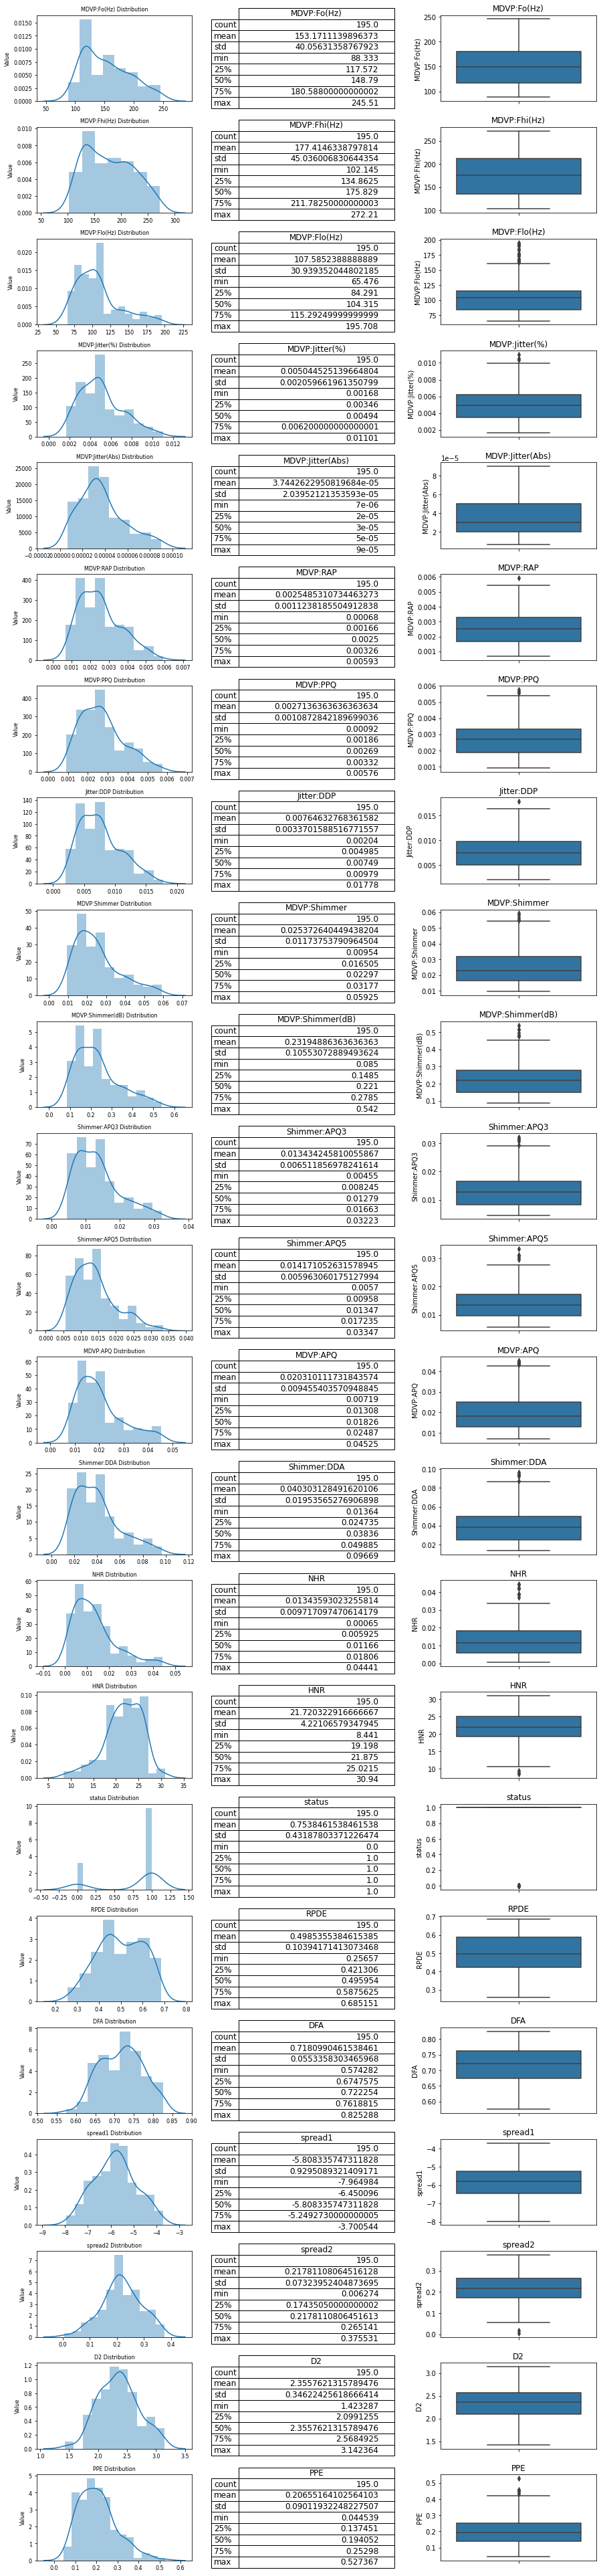

In [12]:
print('After outlier treatment')
warnings.simplefilter(action='ignore', category=FutureWarning)
fig, axes = plt.subplots(nrows=23, ncols=3, figsize=(15, 70))    
for idx,cat_col in enumerate(ds_clone.describe().columns):
    cl_idx=0
    sns.distplot(ds_clone[cat_col],ax=axes[idx,cl_idx])
    plt.title(cat_col)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.2)
    axes[idx][cl_idx].set_title(cat_col+" Distribution",fontsize=8)    
    axes[idx][cl_idx].xaxis.set_tick_params(labelsize=8,rotation=0)
    axes[idx][cl_idx].yaxis.set_tick_params(labelsize=8)
    axes[idx][cl_idx].set_ylabel('Value',fontsize=8)
    axes[idx][cl_idx].set(xlabel=None)    
    df = pd.DataFrame(ds_clone[cat_col], columns=[cat_col])
    des_lb=df.describe()
    axes[idx][cl_idx+1].axis('off')
    axes[idx][cl_idx+1].axis('tight')
    table = axes[idx][cl_idx+1].table(cellText=des_lb.values, colLabels=des_lb.columns, rowLabels=des_lb.index, loc='center')
    table.set_fontsize(12)
    table.scale(1,1.5)    
    sns.boxplot(y=ds_clone[cat_col],ax=axes[idx,cl_idx+2])
    plt.title(cat_col)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.30)
    axes[idx][cl_idx+2].set_title(cat_col,fontsize=12)     
    axes[idx][cl_idx+2].yaxis.set_tick_params(labelsize=10)

Based on above visualiztion, its evident that We are able to treat outlier for the below features
- MDVP:Fhi(Hz) 
- MDVP:Jitter(Abs)
- spread1           
- D2  

There are few other features, That the outlier are still exist even after treatment. So we retained without outlier treatment. This can be handle with higher data distribution.

In [13]:
ds.columns

Index(['name', 'MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

### 2) Identifying data and model issues if any.
Based on above visualiztion, its evident that We are able to treat outlier for the below features

- MDVP:Fhi(Hz)
- MDVP:Jitter(Abs)
- spread1 
- D2

There are few other features, That the outlier are still exist even after treatment. So we igonre without outlier treatment for those. This can be handle with higher data distribution.

In [14]:
ds['MDVP:Fhi(Hz)']=ds_clone['MDVP:Fhi(Hz)']
ds['MDVP:Jitter(Abs)']=ds_clone['MDVP:Jitter(Abs)']
ds['spread1']=ds_clone['spread1']
ds['D2']=ds_clone['D2']
ds=ds.drop(['MDVP:Flo(Hz)', 'MDVP:Shimmer(dB)','NHR', 'PPE','spread2','HNR'], axis=1)
print(ds.shape)
ds.head(5)

(195, 18)


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,status,RPDE,DFA,spread1,D2
0,phon_R01_S01_1,119.992,157.302,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.02182,0.03130,0.02971,0.06545,1,0.414783,0.815285,-4.813031,2.301442
1,phon_R01_S01_2,122.400,148.650,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.03134,0.04518,0.04368,0.09403,1,0.458359,0.819521,-4.075192,2.486855
2,phon_R01_S01_3,116.682,131.111,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.02757,0.03858,0.03590,0.08270,1,0.429895,0.825288,-4.443179,2.342259
3,phon_R01_S01_4,116.676,137.871,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.02924,0.04005,0.03772,0.08771,1,0.434969,0.819235,-4.117501,2.405554
4,phon_R01_S01_5,116.014,141.781,0.01284,0.000037,0.00655,0.00908,0.01966,0.06425,0.03490,0.04825,0.04465,0.10470,1,0.417356,0.823484,-3.747787,2.332180


### 3) Choice of packages and distance measure used. justify your answer.

<b>Package Choice:</b>
- sklearn for metrics preprocessing(LabelEncoder,StandardScaler),model_selection,train_test_split,GridSearchCV,cross_val_score,neighbors import KNeighborsClassifier,metrics(accuracy_score,confusion_matrix,classification_report,roc_curve,auc)
- numpy
- pandas
- seaborn
- matplotlib

The following lists the string metric identifiers and the associated distance metric classes, Metrics intended for real-valued vector spaces:

<table class="docutils align-default">
<colgroup>
<col style="width: 19%">
<col style="width: 27%">
<col style="width: 11%">
<col style="width: 42%">
</colgroup>
<tbody>
<tr class="row-odd"><td><p>identifier</p></td>
<td><p>class name</p></td>
<td><p>args</p></td>
<td><p>distance function</p></td>
</tr>
<tr class="row-even"><td><p>“euclidean”</p></td>
<td><p>EuclideanDistance</p></td>
<td><ul class="simple">
<li></li>
</ul>
</td>
<td><p><code class="docutils literal notranslate"><span class="pre">sqrt(sum((x</span> <span class="pre">-</span> <span class="pre">y)^2))</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>“manhattan”</p></td>
<td><p>ManhattanDistance</p></td>
<td><ul class="simple">
<li></li>
</ul>
</td>
<td><p><code class="docutils literal notranslate"><span class="pre">sum(|x</span> <span class="pre">-</span> <span class="pre">y|)</span></code></p></td>
</tr>
<tr class="row-even"><td><p>“chebyshev”</p></td>
<td><p>ChebyshevDistance</p></td>
<td><ul class="simple">
<li></li>
</ul>
</td>
<td><p><code class="docutils literal notranslate"><span class="pre">max(|x</span> <span class="pre">-</span> <span class="pre">y|)</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>“minkowski”</p></td>
<td><p>MinkowskiDistance</p></td>
<td><p>p</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">sum(|x</span> <span class="pre">-</span> <span class="pre">y|^p)^(1/p)</span></code></p></td>
</tr>
<tr class="row-even"><td><p>“wminkowski”</p></td>
<td><p>WMinkowskiDistance</p></td>
<td><p>p, w</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">sum(|w</span> <span class="pre">*</span> <span class="pre">(x</span> <span class="pre">-</span> <span class="pre">y)|^p)^(1/p)</span></code></p></td>
</tr>
<tr class="row-odd"><td><p>“seuclidean”</p></td>
<td><p>SEuclideanDistance</p></td>
<td><p>V</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">sqrt(sum((x</span> <span class="pre">-</span> <span class="pre">y)^2</span> <span class="pre">/</span> <span class="pre">V))</span></code></p></td>
</tr>
<tr class="row-even"><td><p>“mahalanobis”</p></td>
<td><p>MahalanobisDistance</p></td>
<td><p>V or VI</p></td>
<td><p><code class="docutils literal notranslate"><span class="pre">sqrt((x</span> <span class="pre">-</span> <span class="pre">y)'</span> <span class="pre">V^-1</span> <span class="pre">(x</span> <span class="pre">-</span> <span class="pre">y))</span></code></p></td>
</tr>
</tbody>
</table>

In [15]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   Shimmer:APQ3      195 non-null    float64
 10  Shimmer:APQ5      195 non-null    float64
 11  MDVP:APQ          195 non-null    float64
 12  Shimmer:DDA       195 non-null    float64
 13  status            195 non-null    int64  
 14  RPDE              195 non-null    float64
 15  DFA               195 non-null    float64
 16  spread1           195 non-null    float64
 1

In [16]:
col = ds.pop("status")
ds.insert(len(ds.columns), col.name, col)
df=ds.drop(columns='name')
df.head(10)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,RPDE,DFA,spread1,D2,status
0,119.992,157.302,0.00784,0.000070,0.00370,0.00554,0.01109,0.04374,0.02182,0.03130,0.02971,0.06545,0.414783,0.815285,-4.813031,2.301442,1
1,122.400,148.650,0.00968,0.000080,0.00465,0.00696,0.01394,0.06134,0.03134,0.04518,0.04368,0.09403,0.458359,0.819521,-4.075192,2.486855,1
2,116.682,131.111,0.01050,0.000090,0.00544,0.00781,0.01633,0.05233,0.02757,0.03858,0.03590,0.08270,0.429895,0.825288,-4.443179,2.342259,1
3,116.676,137.871,0.00997,0.000090,0.00502,0.00698,0.01505,0.05492,0.02924,0.04005,0.03772,0.08771,0.434969,0.819235,-4.117501,2.405554,1
4,116.014,141.781,0.01284,0.000037,0.00655,0.00908,0.01966,0.06425,0.03490,0.04825,0.04465,0.10470,0.417356,0.823484,-3.747787,2.332180,1
5,120.552,131.162,0.00968,0.000080,0.00463,0.00750,0.01388,0.04701,0.02328,0.03526,0.03243,0.06985,0.415564,0.825069,-4.242867,2.187560,1
6,120.267,137.244,0.00333,0.000030,0.00155,0.00202,0.00466,0.01608,0.00779,0.00937,0.01351,0.02337,0.596040,0.764112,-5.634322,1.854785,1
7,107.332,113.840,0.00290,0.000030,0.00144,0.00182,0.00431,0.01567,0.00829,0.00946,0.01256,0.02487,0.637420,0.763262,-6.167603,2.064693,1
8,95.730,132.068,0.00551,0.000060,0.00293,0.00332,0.00880,0.02093,0.01073,0.01277,0.01717,0.03218,0.615551,0.773587,-5.498678,2.322511,1
9,95.056,120.103,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.01441,0.01725,0.02444,0.04324,0.547037,0.798463,-5.011879,2.432792,1


In [17]:
X = df.iloc[:,:(len(df.columns)-1)].values
y = df.iloc[:,-1].values
sc = StandardScaler()
X = sc.fit_transform(X)
sc = StandardScaler()
X = sc.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [18]:
def dist_meas_on_classif(met):
    knn = KNeighborsClassifier(n_neighbors=6,metric=met)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print(met.upper()," Accuracy:",metrics.accuracy_score(y_test, y_pred))
    return knn.get_params()

In [19]:
distance_measures=['euclidean','manhattan','chebyshev','hamming','minkowski']
for i in distance_measures:
    print("\n",dist_meas_on_classif(i),"\n")    

EUCLIDEAN  Accuracy: 0.9491525423728814

 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'euclidean', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'} 

MANHATTAN  Accuracy: 0.9491525423728814

 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'} 

CHEBYSHEV  Accuracy: 0.847457627118644

 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'chebyshev', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'} 

HAMMING  Accuracy: 0.7457627118644068

 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'hamming', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'} 

MINKOWSKI  Accuracy: 0.9491525423728814

 {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'uniform'} 



from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

In [20]:
def nn_with_diff_k(kval):
    knn = KNeighborsClassifier(n_neighbors=kval)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

### 4) Selection of train, test split.

- 70% of my total data to train my model and rest 30% to test it. 
- Next, I train my model with different values of “K” and capture its accuracy on my test data.

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=5)

##### k-Fold Cross-Validation
- Cross-validation is when the dataset is randomly split up into ‘k’ groups. 
- One of the groups is used as the test set and the rest are used as the training set. 
- The model is trained on the training set and scored on the test set. 
- Then the process is repeated until each unique group as been used as the test set.

In [22]:
knn_cv = KNeighborsClassifier(n_neighbors=3)
cv_scores = cross_val_score(knn_cv, X_train, y_train, cv=5)
print(cv_scores)
print('cv_scores mean:{}'.format(np.mean(cv_scores)))

[0.85714286 0.96296296 0.88888889 0.77777778 0.96296296]
cv_scores mean:0.8899470899470898


### 5) Final model creation and accuracy matrix selected for the model.

In [23]:
def getKNNClassifierPerformance(k,dmeas):
    knn = KNeighborsClassifier(n_neighbors=k,metric=dmeas)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    model_accuracy=metrics.accuracy_score(y_test, y_pred)
    return model_accuracy
karray=[]
for i in range(1,10):
    karray.append(i+1)
karray

[2, 3, 4, 5, 6, 7, 8, 9, 10]

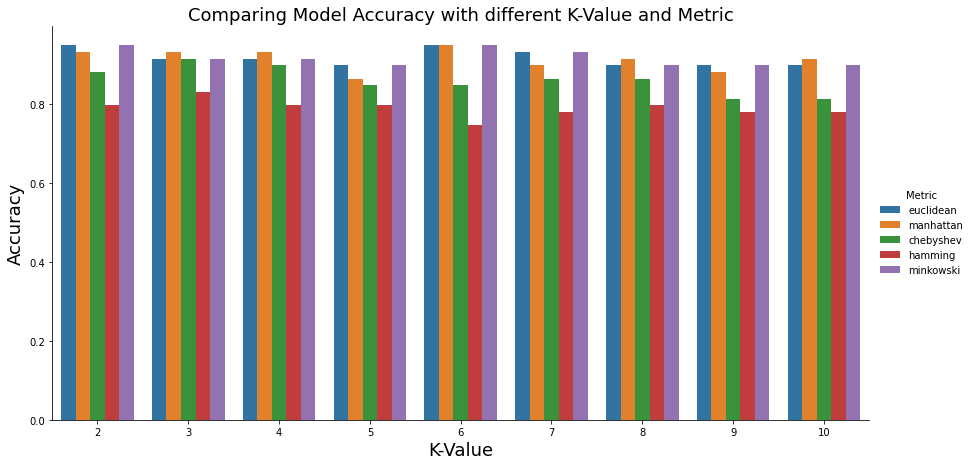

In [24]:
perf_row=[]   
for kValue in karray:
    for dis_meas in distance_measures:
        model_accuracy=getKNNClassifierPerformance(kValue,dis_meas)
        perf_row.append([kValue,dis_meas,dis_meas.upper()+' KValue-'+str(kValue),model_accuracy])
        
model_performance_df = pd.DataFrame(perf_row, columns=["KValue", "Metric","KMet","Accuracy"])
sns.catplot(data=model_performance_df, kind="bar", x="KValue", y="Accuracy", hue="Metric", height=6, aspect=2,)
plt.xlabel('K-Value', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.title("Comparing Model Accuracy with different K-Value and Metric", fontsize=18)
plt.show()

### Hypertuning model parameters using GridSearchCV
- GridSearchCV works by training our model multiple times on a range of parameters that we specify. 
- That way, we can test our model with each parameter and figure out the optimal values to get the best accuracy results.

In [25]:
knn_cls = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 25)}
knn_gscv_inst = GridSearchCV(knn_cls, param_grid, cv=9)
knn_gscv_inst.fit(X_train, y_train)
print(knn_gscv_inst.best_params_)
print(knn_gscv_inst.best_score_)

{'n_neighbors': 3}
0.9125000000000001


### Based on k-Fold Cross-Validation & GridSearchCV, choosing K-3 & Distance EUCLIDEAN  

In [26]:
k_gscv=3
dist_gscv='euclidean'
model = KNeighborsClassifier(n_neighbors=k_gscv,metric=dist_gscv)
model.fit(X_train, y_train)
naive_pre= model.predict(X_test)
cnf_mat=confusion_matrix(y_test,naive_pre)
print(classification_report(y_test,naive_pre))
MNB = accuracy_score(y_test, naive_pre)
print("The Accuracy for KNN With K-Value:{0} with {1} Metric is {2}".format(k_gscv,dist_gscv.upper(),MNB))
MultinomialNBScore = model.score(X_test,y_test)

              precision    recall  f1-score   support

           0       1.00      0.69      0.81        16
           1       0.90      1.00      0.95        43

    accuracy                           0.92        59
   macro avg       0.95      0.84      0.88        59
weighted avg       0.92      0.92      0.91        59

The Accuracy for KNN With K-Value:3 with EUCLIDEAN Metric is 0.9152542372881356


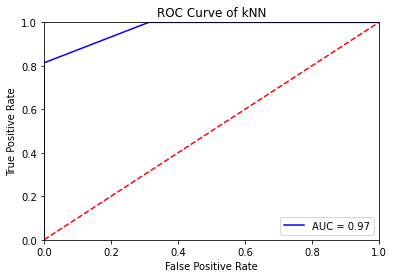

In [27]:
knn = KNeighborsClassifier(n_neighbors = k_gscv,metric=dist_gscv)
knn.fit(X_train,y_train)
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

###### 6) Future scope of the work.
- The proposed method will be implemented in a distributed environment to further improve Parkinson’s Disease diagnostic efficiency. 
- Yet another future scope of work is Feature selection, Given dataset size is small. Feature section with high volume of data


### Identify the optimum no of neighbors and dimensions for your model.
- Optimum k-Value is : 3
- Number of dimensions considered are 17.

### Justify if KNN model should be considered or not for the problem statement.
- <b>K Nearest Neighbors (KNN) algorithms can be considered for this kind of smaller dataset. When dataset size is huge then distance calculation will become more costly, which leads to performance impact.</b>

- The purpose of this above implementation is to distinguishing between Parkinson’s Diseased patient and healthy individual. <b>Experimental results show that the KNN giving considerable accuracy</b>. 
- Where as there are other algorithms also can also be used for this kind of classification. For instance, ANN classifier will also gives higher average performance than the KNN classifier in term of accuracy. 